# DxGPT Evaluation Dashboard

### This repository contains the code and resources for generating a dashboard that facilitates the comparison of prediction scores across different models. It is designed to streamline the evaluation process of machine learning models by providing visual insights into their performance metrics.

### For seeing the dashboard, you can use this repo in Google Colab with the following link:
### [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/foundation29org/dxgpt_testing/blob/main/dashboard.ipynb)

### Therefore, run all the cells in the notebook in order to see the dashboards.

# ----------

### Este repositorio contiene el código y los recursos para generar un tablero que facilite el comparativo de puntuaciones de predicción entre diferentes modelos de inteligencia artificial. Este dashboard está diseñado para simplificar el proceso de evaluación de los modelos de inteligencia artificial mediante la visualización de sus métricas de rendimiento.

### Para ver el tablero, puedes usar este repositorio en Google Colab con el siguiente enlace:
### [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/foundation29org/dxgpt_testing/blob/main/dashboard.ipynb)

### Para continuar, ejecuta todas las celdas del notebook en orden para ver los tableros.

In [ ]:
!git clone https://github.com/foundation29org/dxgpt_testing.git
!pip install plotly
%cd dxgpt_testing
%ls

### In the previous cell, we cloned the repository and installed the necessary packages for this notebook.
### In the next cell, we filter the files in the "data" folder to only include those that start with "scores" and end with ".csv".
### We then print the list of files to the console.

# ----------

### En la anterior celda, clonamos el repositorio y instalamos los paquetes necesarios para este notebook.
### En la siguiente celda, filtramos los archivos en la carpeta "data" para incluir solo aquellos que comiencen con "scores" y terminen con ".csv".
### Luego, imprimimos la lista de archivos al consola.

In [1]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# This file is used to generate a dashboard for easily comparing the scores of the predictions between different models.

# Filter data folder for files starting with "scores"
path = "data"
files = [f for f in os.listdir(path) if f.startswith('scores') and f.endswith('.csv')]
print(files)

files_URG = [f for f in files if f.startswith('scores_URG_Torre_Dic_')]

files_v2 = [f for f in files if f.startswith('scores_v2')]

files_RAMEDIS = [f for f in files if f.startswith('scores_RAMEDIS')]

files_PUMCH_ADM = [f for f in files if f.startswith('scores_PUMCH_ADM')]

files_sequential = [f for f in files if f.startswith('scores_seq')]

print("Files Urgencias HM:")
print(files_URG)

print("Files v2:")
print(files_v2)

print("Files RAMEDIS:")
print(files_RAMEDIS)

print("Files PUMCH_ADM:")
print(files_PUMCH_ADM)

print("Files Sequential:")
print(files_sequential)

path_ruber = "Ruber_cases"
files = [f for f in os.listdir(path_ruber) if f.startswith('scores') and f.endswith('.csv')]
# print(files)

files_RUBER = [f for f in files if f.startswith('scores_RUBER')]

print("Files RUBER:")
print(files_RUBER)

path_sjd = "SJD_cases"
files = [f for f in os.listdir(path_sjd) if f.startswith('scores') and f.endswith('.csv')]
# print(files)

files_SJD = [f for f in files if f.startswith('scores_SJD')]

print("Files SJD:")
print(files_SJD)

['scores_RAMEDIS_llama3_8b.csv', 'scores_PUMCH_ADM_c3opus.csv', 'scores.csv', 'scores_URG_Torre_Dic_1000_gpt4_0613.csv', 'scores_RAMEDIS_gpt4_0613.csv', 'scores_PUMCH_ADM_cohere_cplus.csv', 'scores_RAMEDIS_gpt4o_json_risk.csv', 'scores_seq_diagnoses_URG_Torre_Dic_200_gpt4_0613.csv', 'scores_v2_gpt4turbo0409.csv', 'scores_medisearch_v2_gpt4turbo1106.csv', 'scores_URG_Torre_Dic_1000_c35sonnet.csv', 'scores_URG_Torre_Dic_200_gpt4o_json_2.csv', 'scores_RAMEDIS_gpt4o_json.csv', 'scores_nov.csv', 'scores_URG_Torre_Dic_200_mistral7b.csv', 'scores_URG_Torre_Dic_200_cohere_cplus.csv', 'scores_URG_Torre_Dic_200_gpt4o.csv', 'scores_v2_mistralmoe.csv', 'scores_URG_Torre_Dic_200_gpt4turbo0409.csv', 'scores_URG_Torre_Dic_200_mistralmoe.csv', 'scores_turbo.csv', 'scores_RAMEDIS_gpt4o.csv', 'scores_v2_c3opus.csv', 'scores_URG_Torre_Dic_200_mixtralmoe_big.csv', 'scores_URG_Torre_Dic_200_improved_c3opus.csv', 'scores_v2_llama3_70b.csv', 'scores_PUMCH_ADM_mixtralmoe_big.csv', 'scores_seq_diagnoses_v2_gpt

### We define a function to calculate the statistics for each file group
### This function takes a DataFrame as input and calculates the number of P1, P5, and P0 scores, as well as the strict and lenient accuracy.
### It returns the counts for each score and the calculated accuracy metrics.

### P1 is the score when the correct diagnosis appears in the first position
### P5 is the score when the correct diagnosis appears in any of the five positions
### P0 is the score when the correct diagnosis does not appear at all

# ----------

### Definimos una función para calcular las estadísticas de cada grupo de archivos
### Esta función toma un DataFrame como entrada y calcula el nmero de P1, P5 y P0, así como la precisión estricta y la precisión leniente.
### Devuelve los contadores de cada puntuación y las métricas de precisión calculadas.

### P1 es la puntuación cuando el diagnóstico correcto aparece en la primera posición
### P5 es la puntuación cuando el diagnóstico correcto aparece en cualquiera de las cinco posiciones
### P0 es la puntuación cuando el diagnóstico correcto no aparece en absoluto

In [2]:
def get_stats_for_df(df):
    count_p1 = df['Score'].value_counts()['P1']
    count_p5 = df[df['Score'].isin(['P2', 'P3', 'P4', 'P5'])].shape[0]
    count_p0 = df['Score'].value_counts()['P0']

    # Calculate total number of predictions
    total_predictions = count_p1 + count_p5 + count_p0

    # print("total_predictions:" , total_predictions)

    # Calculate Strict Accuracy
    strict_accuracy = (count_p1 / total_predictions) * 100

    # Calculate Lenient Accuracy
    lenient_accuracy = ((count_p1 + count_p5) / total_predictions) * 100

    return count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy, total_predictions

def get_stats_for_df_200(df):
    # Same but limited to df[:200]
    top_200_df = df[:200]
    count_p1 = top_200_df['Score'].value_counts()['P1']
    count_p5 = top_200_df[top_200_df['Score'].isin(['P2', 'P3', 'P4', 'P5'])].shape[0]
    count_p0 = top_200_df['Score'].value_counts()['P0']

    # Calculate total number of predictions
    total_predictions = count_p1 + count_p5 + count_p0

    # print("total_predictions:" , total_predictions)

    # Calculate Strict Accuracy
    strict_accuracy = (count_p1 / total_predictions) * 100

    # Calculate Lenient Accuracy
    lenient_accuracy = ((count_p1 + count_p5) / total_predictions) * 100

    return count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy, total_predictions

In [3]:
print("* means that the stats are for the first 200 predictions")
# print 4 pairs of values: dataset, model, strict accuracy, lenient accuracy
def print_stats_for_files(files):
    for file in files:
        df = pd.read_csv(f'{path}/{file}')
        if file == "scores_URG_Torre_Dic_1000_c35sonnet.csv" or file == "scores_URG_Torre_Dic_1000_gpt4_0613.csv" or file == "scores_URG_Torre_Dic_1000_gpt4o.csv":
            count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy, total_predictions = get_stats_for_df_200(df)
            print(f'{file}* of ({total_predictions}): {strict_accuracy:.2f}% ({lenient_accuracy:.2f}%)')
        count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy, total_predictions = get_stats_for_df(df)
        print(f'{file} of ({total_predictions}): {strict_accuracy:.2f}% ({lenient_accuracy:.2f}%)')

path = "data"
# print("Stats Urgencias HM:")
print_stats_for_files(files_URG)

# print("Stats Sequential:")
# print_stats_for_files(files_sequential)

# print("Stats v2:")
# print_stats_for_files(files_v2)

# print("Stats RAMEDIS:")
print_stats_for_files(files_RAMEDIS)

# print("Stats PUMCH_ADM:")
# print_stats_for_files(files_PUMCH_ADM)

# path = path_ruber
# print("Stats RUBER:")
# print_stats_for_files(files_RUBER)

path = path_sjd
print("Stats SJD:")
print_stats_for_files(files_SJD)

* means that the stats are for the first 200 predictions
scores_URG_Torre_Dic_1000_gpt4_0613.csv* of (200): 25.00% (79.50%)
scores_URG_Torre_Dic_1000_gpt4_0613.csv of (1000): 27.30% (78.70%)
scores_URG_Torre_Dic_1000_c35sonnet.csv* of (200): 33.50% (89.00%)
scores_URG_Torre_Dic_1000_c35sonnet.csv of (999): 32.93% (85.69%)
scores_URG_Torre_Dic_200_gpt4o_json_2.csv of (199): 20.10% (90.45%)
scores_URG_Torre_Dic_200_mistral7b.csv of (200): 25.00% (67.00%)
scores_URG_Torre_Dic_200_cohere_cplus.csv of (200): 28.00% (82.50%)
scores_URG_Torre_Dic_200_gpt4o.csv of (200): 33.00% (89.50%)
scores_URG_Torre_Dic_200_gpt4turbo0409.csv of (200): 35.00% (85.50%)
scores_URG_Torre_Dic_200_mistralmoe.csv of (200): 31.00% (77.50%)
scores_URG_Torre_Dic_200_mixtralmoe_big.csv of (200): 29.50% (84.50%)
scores_URG_Torre_Dic_200_improved_c3opus.csv of (199): 27.64% (79.90%)
scores_URG_Torre_Dic_200_c3sonnet.csv of (200): 30.50% (87.50%)
scores_URG_Torre_Dic_200_llama2_7b.csv of (200): 17.50% (57.00%)
scores_UR

### In the next cell, we create a list to store the data for each file group
### We then process each file in the files_v2 list and store the data in the data_v2 list
### We do the same for the files_URG list, storing the data in the data_URG list

### Then we create a DataFrame for each file group
### We add the first table to the first subplot
### We add the second table to the second subplot
### We update the layout and display the dashboard

# ----------

### En la siguiente celda, creamos una lista para almacenar los datos de cada grupo de archivos
### Luego, procesamos cada archivo de la lista files_v2 y almacenamos los datos en la lista data_v2
### Hacemos lo mismo para la lista files_URG, almacenando los datos en la lista data_URG

### Luego, creamos un DataFrame para cada grupo de archivos
### Añadimos la primera tabla al primer subplot
### Añadimos la segunda tabla al segundo subplot
### Actualizamos el diseño y mostramos el tablero

In [4]:
# Create a list to store the data for each file group
data_v2 = []
data_URG = []
data_RAMEDIS = []
data_PUMCH_ADM = []

# Process files_v2 and store the data
for file in files_v2:
    df = pd.read_csv(f'{path}/{file}')
    count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy = get_stats_for_df(df)
    data_v2.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])

# Process files_URG and store the data
for file in files_URG:
    df = pd.read_csv(f'{path}/{file}')
    count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy = get_stats_for_df(df)
    data_URG.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])

for file in files_RAMEDIS:
    df = pd.read_csv(f'{path}/{file}')
    count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy = get_stats_for_df(df)
    data_RAMEDIS.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])

for file in files_PUMCH_ADM:
    df = pd.read_csv(f'{path}/{file}')
    count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy = get_stats_for_df(df)
    data_PUMCH_ADM.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])

# Create DataFrames for each file group
df_v2 = pd.DataFrame(data_v2, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])
df_URG = pd.DataFrame(data_URG, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])
df_RAMEDIS = pd.DataFrame(data_RAMEDIS, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])
df_PUMCH_ADM = pd.DataFrame(data_PUMCH_ADM, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])

# Create subplots with 2 rows and 1 column, specifying subplot type as 'domain'
fig = make_subplots(rows=4, cols=1, subplot_titles=('v2 Files', 'URG Files', 'RAMEDIS Files', 'PUMCH_ADM Files'), specs=[[{'type': 'domain'}], [{'type': 'domain'}], [{'type': 'domain'}], [{'type': 'domain'}]])

# Add the first table to the first subplot
fig.add_trace(
    go.Table(
        header=dict(values=list(df_v2.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df_v2.File, df_v2.P1, df_v2.P5, df_v2.P0, df_v2['Strict Accuracy'], df_v2['Lenient Accuracy']],
                   fill_color='lavender',
                   align='left')
    ),
    row=1, col=1
)

# Add the second table to the second subplot
fig.add_trace(
    go.Table(
        header=dict(values=list(df_URG.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df_URG.File, df_URG.P1, df_URG.P5, df_URG.P0, df_URG['Strict Accuracy'], df_URG['Lenient Accuracy']],
                   fill_color='lavender',
                   align='left')
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(values=list(df_RAMEDIS.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df_RAMEDIS.File, df_RAMEDIS.P1, df_RAMEDIS.P5, df_RAMEDIS.P0, df_RAMEDIS['Strict Accuracy'], df_RAMEDIS['Lenient Accuracy']],
                   fill_color='lavender',
                   align='left')
    ),
    row=3, col=1
)

fig.add_trace(
    go.Table(
        header=dict(values=list(df_PUMCH_ADM.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df_PUMCH_ADM.File, df_PUMCH_ADM.P1, df_PUMCH_ADM.P5, df_PUMCH_ADM.P0, df_PUMCH_ADM['Strict Accuracy'], df_PUMCH_ADM['Lenient Accuracy']],
                   fill_color='lavender',
                   align='left')
    ),
    row=4, col=1
)

# Update the layout
fig.update_layout(
    title='Prediction Scores Dashboard',
    height=1200,
)

# Display the dashboard
fig.show()

### In the next cell, the difference is that we also discriminate between improved and non-improved prompts
### We create lists to store the data for each file group

### We then repeat as in the previous cell, but showing the graphs for the improved prompts

# ----------

### En la siguiente celda, la diferencia es que discriminamos entre prompts mejorados y no mejorados
### Creamos listas para almacenar los datos de cada grupo de archivos

### Repetimos lo anterior, pero mostrando los gráficos para los prompts mejorados

In [5]:
# Create lists to store the data for each file group
data_v2 = []
data_v2_improved = []
data_URG = []
data_URG_improved = []

# Process files_v2 and store the data
for file in files_v2:
    df = pd.read_csv(f'{path}/{file}')
    count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy = get_stats_for_df(df)
    if 'improved' in file:
        data_v2_improved.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])
    else:
        data_v2.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])

# Process files_URG and store the data
for file in files_URG:
    df = pd.read_csv(f'{path}/{file}')
    count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy = get_stats_for_df(df)
    if 'improved' in file:
        data_URG_improved.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])
    else:
        data_URG.append([file, count_p1, count_p5, count_p0, strict_accuracy, lenient_accuracy])

# Create DataFrames for each file group
df_v2 = pd.DataFrame(data_v2, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])
df_v2_improved = pd.DataFrame(data_v2_improved, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])
df_URG = pd.DataFrame(data_URG, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])
df_URG_improved = pd.DataFrame(data_URG_improved, columns=['File', 'P1', 'P5', 'P0', 'Strict Accuracy', 'Lenient Accuracy'])

# Create subplots with 4 rows and 1 column, specifying subplot type as 'domain'
fig = make_subplots(rows=4, cols=1, subplot_titles=('v2 Files', 'v2 Improved Files', 'URG Files', 'URG Improved Files'),
                    specs=[[{'type': 'domain'}], [{'type': 'domain'}], [{'type': 'domain'}], [{'type': 'domain'}]])

# Add the tables to the respective subplots
fig.add_trace(go.Table(
    header=dict(values=list(df_v2.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_v2.File, df_v2.P1, df_v2.P5, df_v2.P0, df_v2['Strict Accuracy'], df_v2['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=1, col=1)

fig.add_trace(go.Table(
    header=dict(values=list(df_v2_improved.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_v2_improved.File, df_v2_improved.P1, df_v2_improved.P5, df_v2_improved.P0, df_v2_improved['Strict Accuracy'], df_v2_improved['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=2, col=1)

fig.add_trace(go.Table(
    header=dict(values=list(df_URG.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_URG.File, df_URG.P1, df_URG.P5, df_URG.P0, df_URG['Strict Accuracy'], df_URG['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=3, col=1)

fig.add_trace(go.Table(
    header=dict(values=list(df_URG_improved.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_URG_improved.File, df_URG_improved.P1, df_URG_improved.P5, df_URG_improved.P0, df_URG_improved['Strict Accuracy'], df_URG_improved['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=4, col=1)

# Update the layout
fig.update_layout(
    title='Prediction Scores Dashboard',
    height=1200
)

# Display the dashboard
fig.show()

### Lastly, we create a dashboard with 4 rows and 3 columns
### We add the tables to the respective subplots
### We also create graphs for the accuracy and scores for each file group
### We update the layout and display the dashboard

# ----------

### Por último, creamos un tablero con 4 filas y 3 columnas
### Añadimos las tablas a los subplots correspondientes
### También creamos gráficos para la precisión y puntuaciones de cada grupo de archivos
### Actualizamos el diseño y mostramos el tablero

In [6]:
# Create subplots with 4 rows and 3 columns
fig = make_subplots(rows=4, cols=3, subplot_titles=('v2 Files', 'v2 Accuracy', 'v2 Scores',
                                                    'v2 Improved Files', 'v2 Improved Accuracy', 'v2 Improved Scores',
                                                    'URG Files', 'URG Accuracy', 'URG Scores',
                                                    'URG Improved Files', 'URG Improved Accuracy', 'URG Improved Scores'),
                    specs=[[{'type': 'domain'}, {'type': 'xy'}, {'type': 'xy'}],
                           [{'type': 'domain'}, {'type': 'xy'}, {'type': 'xy'}],
                           [{'type': 'domain'}, {'type': 'xy'}, {'type': 'xy'}],
                           [{'type': 'domain'}, {'type': 'xy'}, {'type': 'xy'}]])

# Add the tables to the respective subplots
fig.add_trace(go.Table(
    header=dict(values=list(df_v2.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_v2.File, df_v2.P1, df_v2.P5, df_v2.P0, df_v2['Strict Accuracy'], df_v2['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=1, col=1)

fig.add_trace(go.Table(
    header=dict(values=list(df_v2_improved.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_v2_improved.File, df_v2_improved.P1, df_v2_improved.P5, df_v2_improved.P0, df_v2_improved['Strict Accuracy'], df_v2_improved['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=2, col=1)

fig.add_trace(go.Table(
    header=dict(values=list(df_URG.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_URG.File, df_URG.P1, df_URG.P5, df_URG.P0, df_URG['Strict Accuracy'], df_URG['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=3, col=1)

fig.add_trace(go.Table(
    header=dict(values=list(df_URG_improved.columns), fill_color='paleturquoise', align='left'),
    cells=dict(values=[df_URG_improved.File, df_URG_improved.P1, df_URG_improved.P5, df_URG_improved.P0, df_URG_improved['Strict Accuracy'], df_URG_improved['Lenient Accuracy']],
               fill_color='lavender', align='left')
), row=4, col=1)

# Add accuracy comparison for v2 files
fig.add_trace(go.Bar(x=df_v2['File'], y=df_v2['Strict Accuracy'], name='Strict Accuracy', marker_color='blue'), row=1, col=2)
fig.add_trace(go.Bar(x=df_v2['File'], y=df_v2['Lenient Accuracy'], name='Lenient Accuracy', marker_color='green'), row=1, col=2)

# Add score comparison for v2 files
fig.add_trace(go.Bar(x=df_v2['File'], y=df_v2['P1'], name='P1', marker_color='red'), row=1, col=3)
fig.add_trace(go.Bar(x=df_v2['File'], y=df_v2['P5'], name='P5', marker_color='orange'), row=1, col=3)
fig.add_trace(go.Bar(x=df_v2['File'], y=df_v2['P0'], name='P0', marker_color='purple'), row=1, col=3)

# Add accuracy comparison for v2 improved files
fig.add_trace(go.Bar(x=df_v2_improved['File'], y=df_v2_improved['Strict Accuracy'], name='Strict Accuracy', marker_color='blue'), row=2, col=2)
fig.add_trace(go.Bar(x=df_v2_improved['File'], y=df_v2_improved['Lenient Accuracy'], name='Lenient Accuracy', marker_color='green'), row=2, col=2)

# Add score comparison for v2 improved files
fig.add_trace(go.Bar(x=df_v2_improved['File'], y=df_v2_improved['P1'], name='P1', marker_color='red'), row=2, col=3)
fig.add_trace(go.Bar(x=df_v2_improved['File'], y=df_v2_improved['P5'], name='P5', marker_color='orange'), row=2, col=3)
fig.add_trace(go.Bar(x=df_v2_improved['File'], y=df_v2_improved['P0'], name='P0', marker_color='purple'), row=2, col=3)

# Add accuracy comparison for URG files
fig.add_trace(go.Bar(x=df_URG['File'], y=df_URG['Strict Accuracy'], name='Strict Accuracy', marker_color='blue'), row=3, col=2)
fig.add_trace(go.Bar(x=df_URG['File'], y=df_URG['Lenient Accuracy'], name='Lenient Accuracy', marker_color='green'), row=3, col=2)

# Add score comparison for URG files
fig.add_trace(go.Bar(x=df_URG['File'], y=df_URG['P1'], name='P1', marker_color='red'), row=3, col=3)
fig.add_trace(go.Bar(x=df_URG['File'], y=df_URG['P5'], name='P5', marker_color='orange'), row=3, col=3)
fig.add_trace(go.Bar(x=df_URG['File'], y=df_URG['P0'], name='P0', marker_color='purple'), row=3, col=3)

# Add accuracy comparison for URG improved files
fig.add_trace(go.Bar(x=df_URG_improved['File'], y=df_URG_improved['Strict Accuracy'], name='Strict Accuracy', marker_color='blue'), row=4, col=2)
fig.add_trace(go.Bar(x=df_URG_improved['File'], y=df_URG_improved['Lenient Accuracy'], name='Lenient Accuracy', marker_color='green'), row=4, col=2)

# Add score comparison for URG improved files
fig.add_trace(go.Bar(x=df_URG_improved['File'], y=df_URG_improved['P1'], name='P1', marker_color='red'), row=4, col=3)
fig.add_trace(go.Bar(x=df_URG_improved['File'], y=df_URG_improved['P5'], name='P5', marker_color='orange'), row=4, col=3)
fig.add_trace(go.Bar(x=df_URG_improved['File'], y=df_URG_improved['P0'], name='P0', marker_color='purple'), row=4, col=3)

# Update the layout
fig.update_layout(
    title='Prediction Scores Dashboard',
    height=1600,
    showlegend=True
)

# Display the dashboard
fig.show()

## Calculating p-values

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.contingency_tables import mcnemar

# Load the diagnostic accuracy data into a pandas DataFrame
data = pd.read_csv('data/diagnostic_accuracy_data.csv')

# Define the significance level
alpha = 0.05

# Compare AI models within each dataset
datasets = ['Synthetic', 'RAMEDIS', 'PUMCH']
for dataset in datasets:
    print(f"Comparing AI models within the {dataset} dataset:")
    dataset_data = data[data['Dataset'] == dataset]
    models = dataset_data['Model'].unique()
    
    for metric in ['Strict Accuracy', 'Top-5 Accuracy']:
        contingency_table = pd.crosstab(dataset_data['Model'], dataset_data[metric])
        
        if contingency_table.shape == (2, 2):
            _, p_value, _, _ = fisher_exact(contingency_table)
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
        
        print(f"  {metric}: p-value = {p_value:.3f}")
        if p_value < alpha:
            print(f"    Significant difference in {metric} between AI models in the {dataset} dataset.")
        else:
            print(f"    No significant difference in {metric} between AI models in the {dataset} dataset.")
    print()

Comparing AI models within the Synthetic dataset:
  Strict Accuracy: p-value = 0.233
    No significant difference in Strict Accuracy between AI models in the Synthetic dataset.
  Top-5 Accuracy: p-value = 0.251
    No significant difference in Top-5 Accuracy between AI models in the Synthetic dataset.

Comparing AI models within the RAMEDIS dataset:
  Strict Accuracy: p-value = 0.233
    No significant difference in Strict Accuracy between AI models in the RAMEDIS dataset.
  Top-5 Accuracy: p-value = 0.233
    No significant difference in Top-5 Accuracy between AI models in the RAMEDIS dataset.

Comparing AI models within the PUMCH dataset:
  Strict Accuracy: p-value = 0.251
    No significant difference in Strict Accuracy between AI models in the PUMCH dataset.
  Top-5 Accuracy: p-value = 0.233
    No significant difference in Top-5 Accuracy between AI models in the PUMCH dataset.



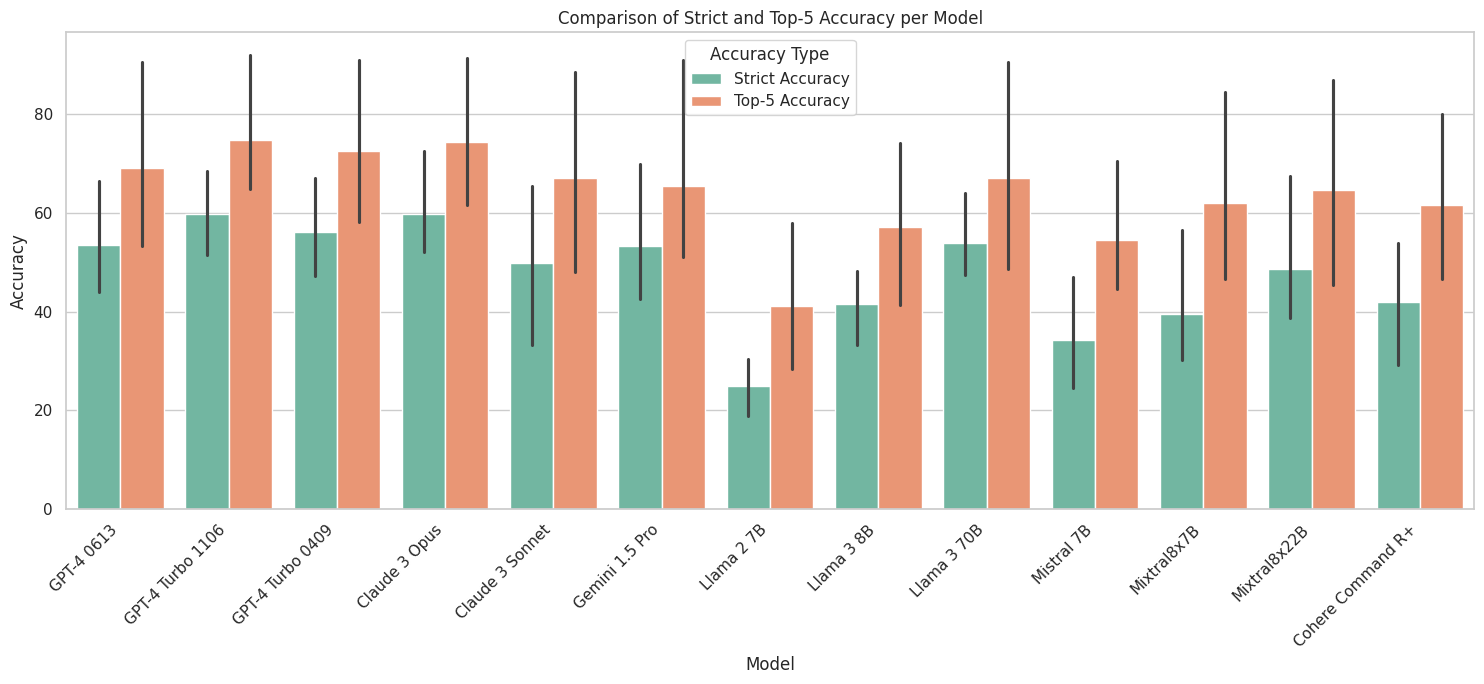

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Bar Plot - Strict and Top-5 Accuracy per Model
fig, ax = plt.subplots(figsize=(15, 7))
data_melt = data.melt(id_vars=["Model"], value_vars=["Strict Accuracy", "Top-5 Accuracy"], var_name="Accuracy Type", value_name="Accuracy")
sns.barplot(x="Model", y="Accuracy", hue="Accuracy Type", data=data_melt, ax=ax, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of Strict and Top-5 Accuracy per Model")
plt.tight_layout()
plt.show()


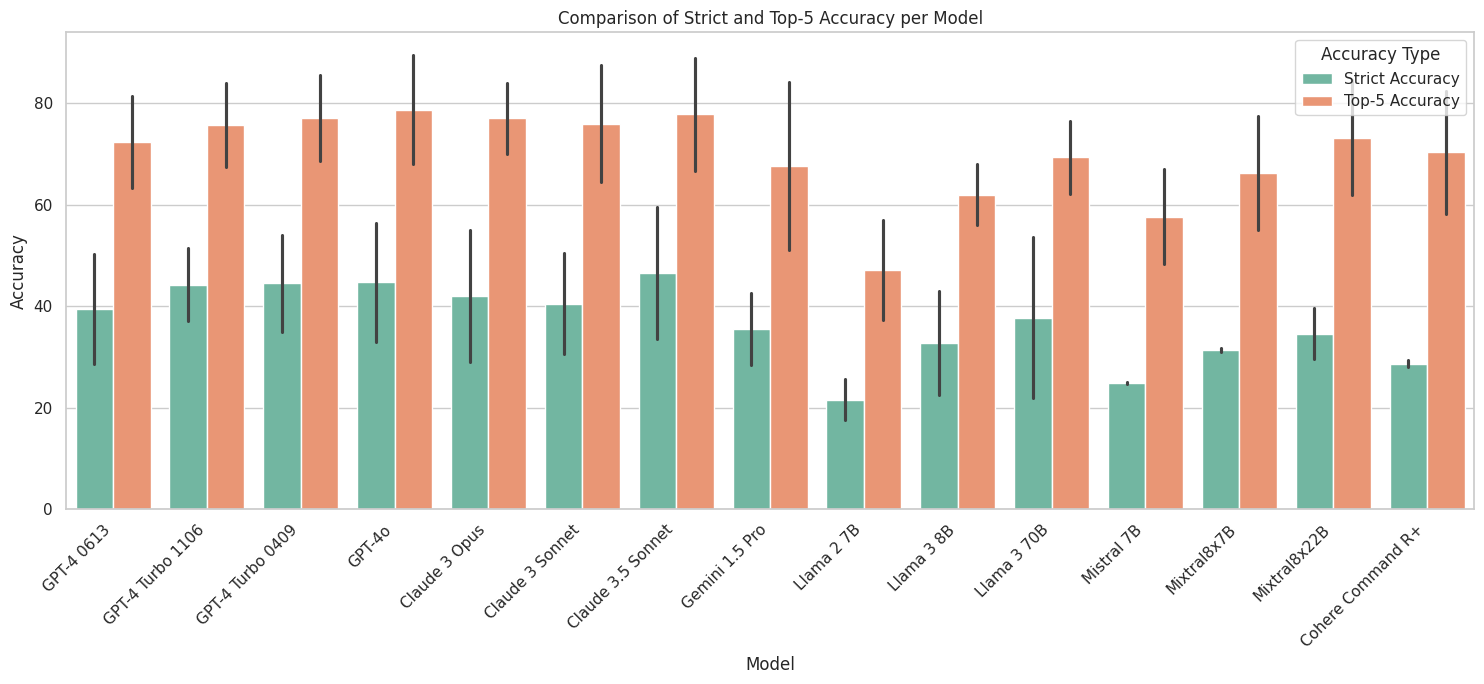

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.contingency_tables import mcnemar
import seaborn as sns
import matplotlib.pyplot as plt


# Load the diagnostic accuracy data into a pandas DataFrame
data = pd.read_csv('data/diagnostic_accuracy_data_240724.csv')

# Set the style
sns.set(style="whitegrid")

# Bar Plot - Strict and Top-5 Accuracy per Model
fig, ax = plt.subplots(figsize=(15, 7))
data_melt = data.melt(id_vars=["Model"], value_vars=["Strict Accuracy", "Top-5 Accuracy"], var_name="Accuracy Type", value_name="Accuracy")
sns.barplot(x="Model", y="Accuracy", hue="Accuracy Type", data=data_melt, ax=ax, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of Strict and Top-5 Accuracy per Model")
plt.tight_layout()
plt.show()

# Save the plot as png
plt.savefig('strict_top5_accuracy_comparison.png', dpi=600, bbox_inches='tight')
plt.close()  # Close the plot to free up memory



/tmp/ipykernel_226245/3434152581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Strict Accuracy", data=data, ax=axes[0], palette="Set3")
/tmp/ipykernel_226245/3434152581.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Top-5 Accuracy", data=data, ax=axes[1], palette="Set3")


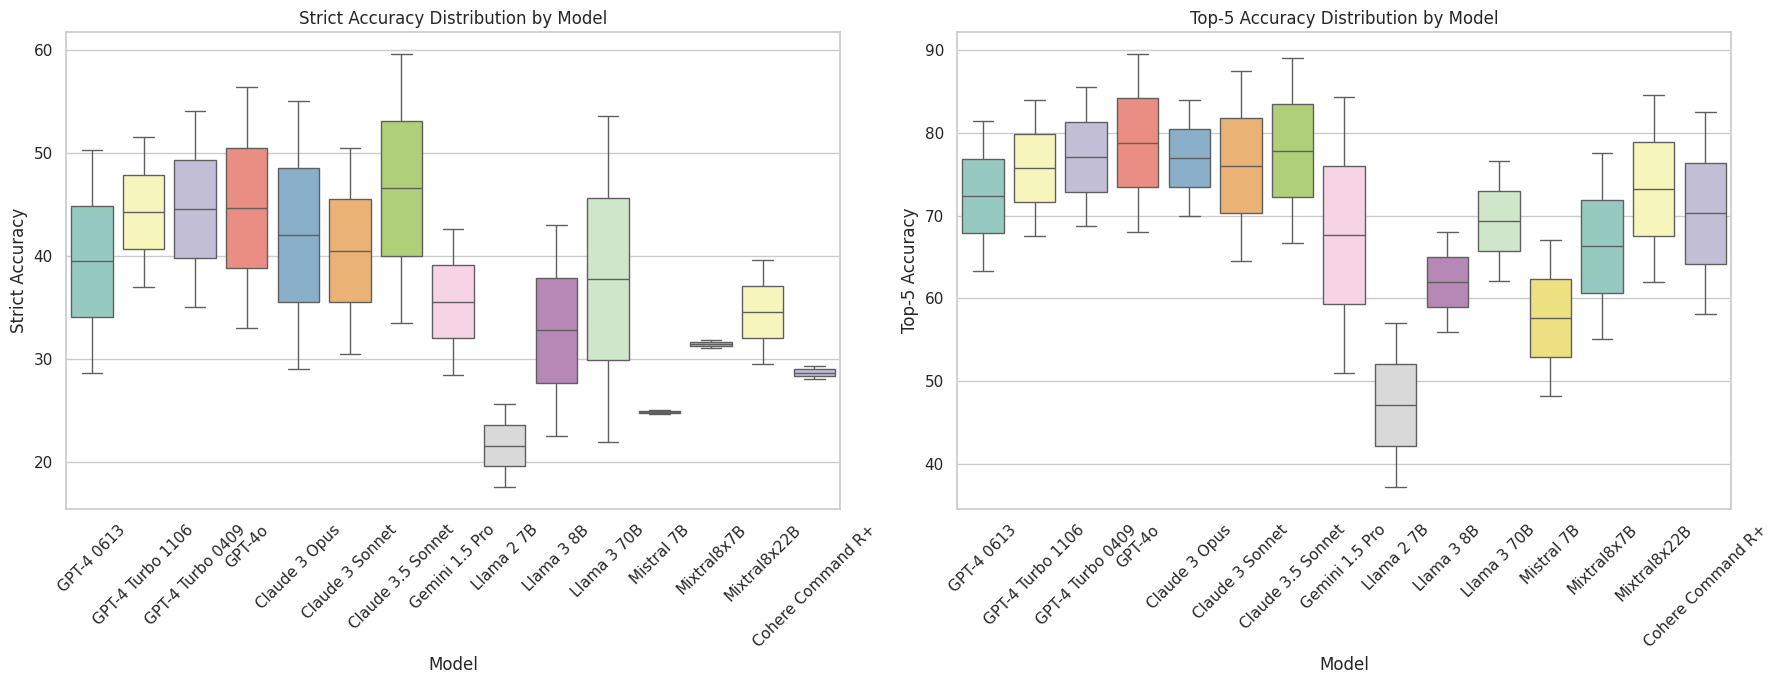

In [8]:
# Box Plots - Distribution of Strict and Top-5 Accuracy by Model
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Strict Accuracy Box Plot
sns.boxplot(x="Model", y="Strict Accuracy", data=data, ax=axes[0], palette="Set3")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title("Strict Accuracy Distribution by Model")

# Top-5 Accuracy Box Plot
sns.boxplot(x="Model", y="Top-5 Accuracy", data=data, ax=axes[1], palette="Set3")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Top-5 Accuracy Distribution by Model")

plt.tight_layout()
plt.show()


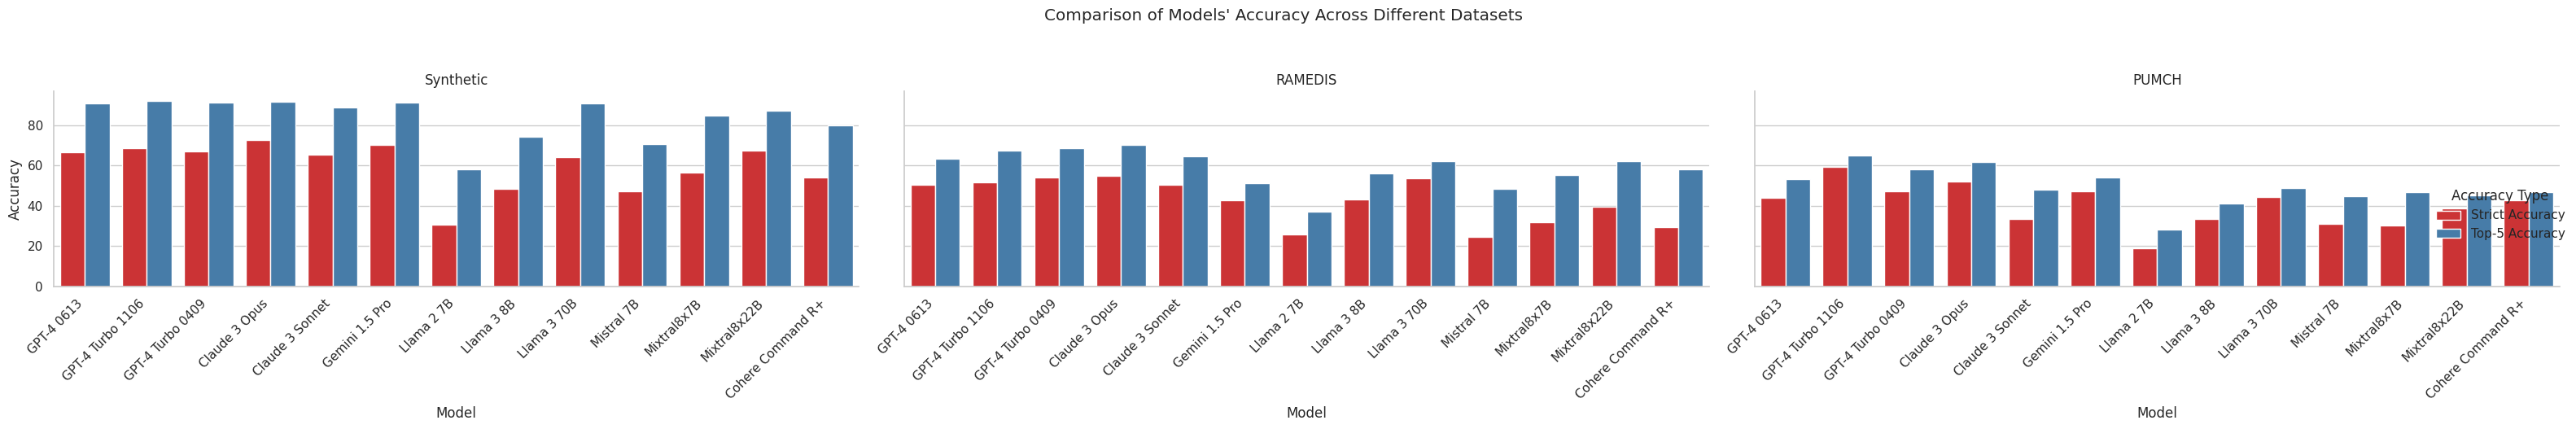

In [11]:
# Facet Grid - Models' Accuracy Across Different Datasets
facet_data = data.melt(id_vars=["Model", "Dataset"], value_vars=["Strict Accuracy", "Top-5 Accuracy"], var_name="Accuracy Type", value_name="Accuracy")

g = sns.catplot(x="Model", y="Accuracy", hue="Accuracy Type", col="Dataset", data=facet_data, kind="bar", height=5, aspect=2, palette="Set1")
g.set_xticklabels(rotation=45, ha="right")
g.set_titles("{col_name}")
plt.suptitle("Comparison of Models' Accuracy Across Different Datasets", y=1.05)
plt.tight_layout()
plt.show()


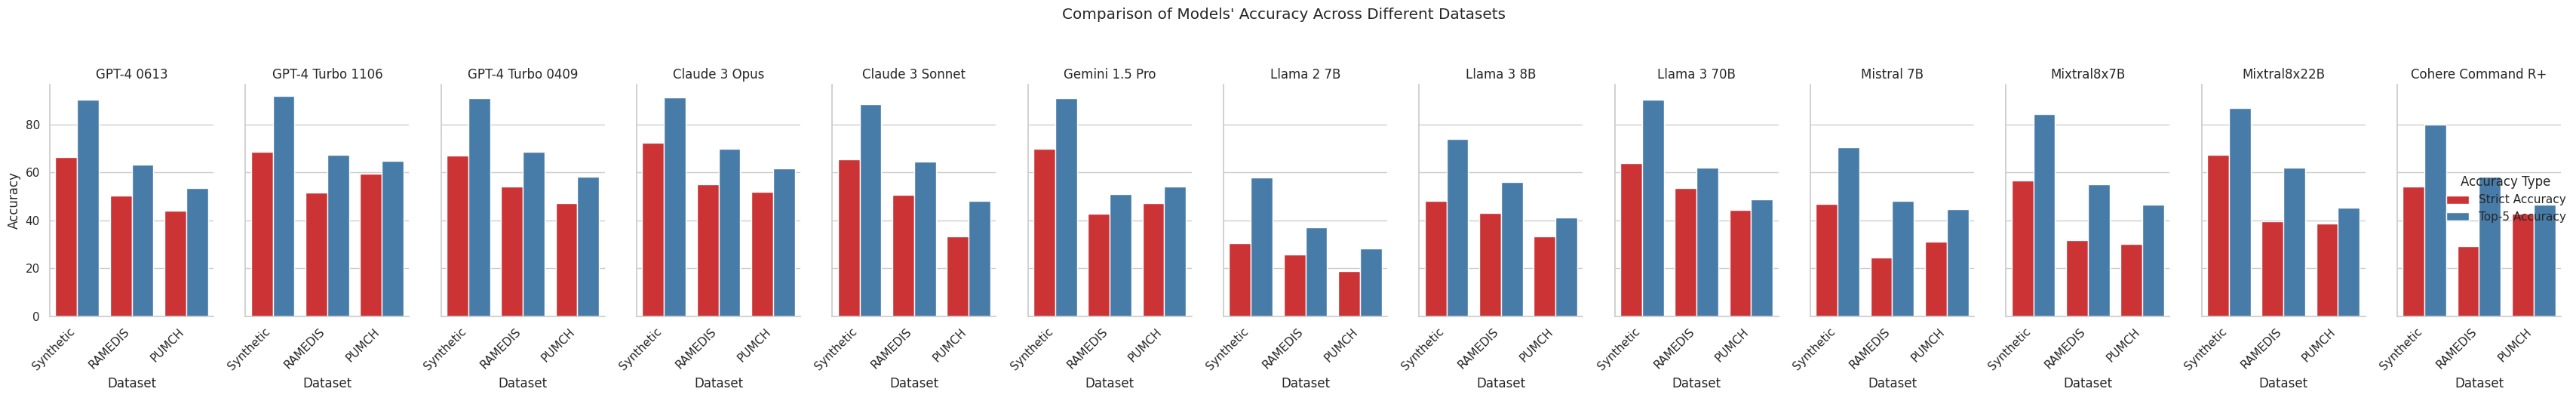

In [13]:
# Facet Grid - Dataset' Accuracy Across Different Models
facet_data = data.melt(id_vars=["Model", "Dataset"], value_vars=["Strict Accuracy", "Top-5 Accuracy"], var_name="Accuracy Type", value_name="Accuracy")

g = sns.catplot(x="Dataset", y="Accuracy", hue="Accuracy Type", col="Model", data=facet_data, kind="bar", height=5, aspect=0.5, palette="Set1")
g.set_xticklabels(rotation=45, ha="right")
g.set_titles("{col_name}")
plt.suptitle("Comparison of Models' Accuracy Across Different Datasets", y=1.05)
plt.tight_layout()
plt.show()

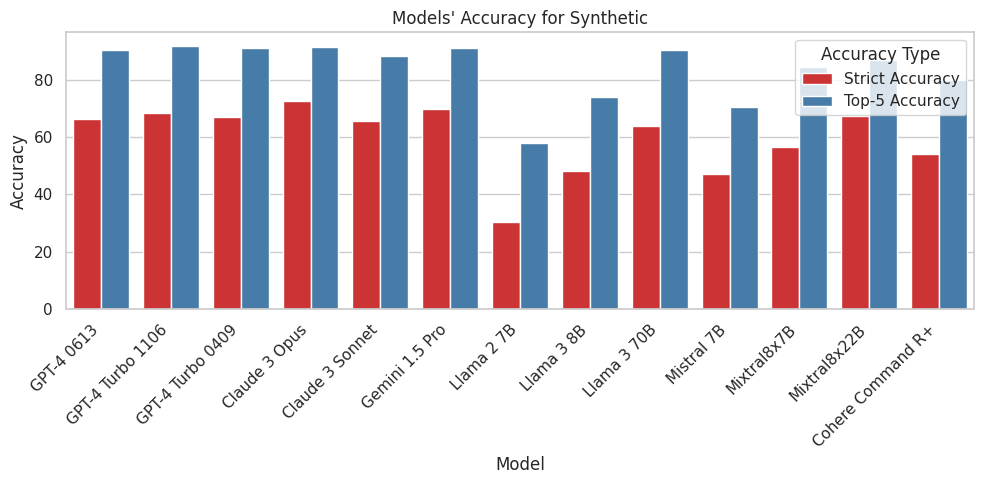

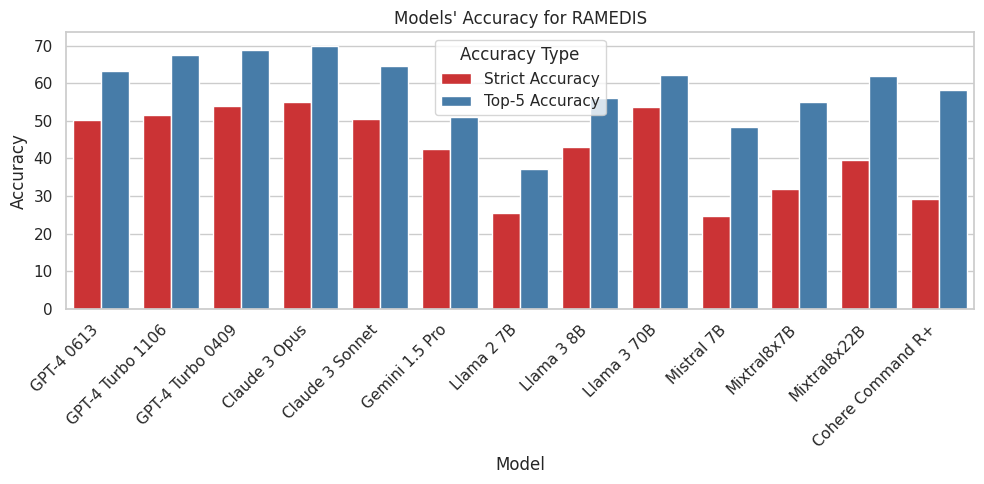

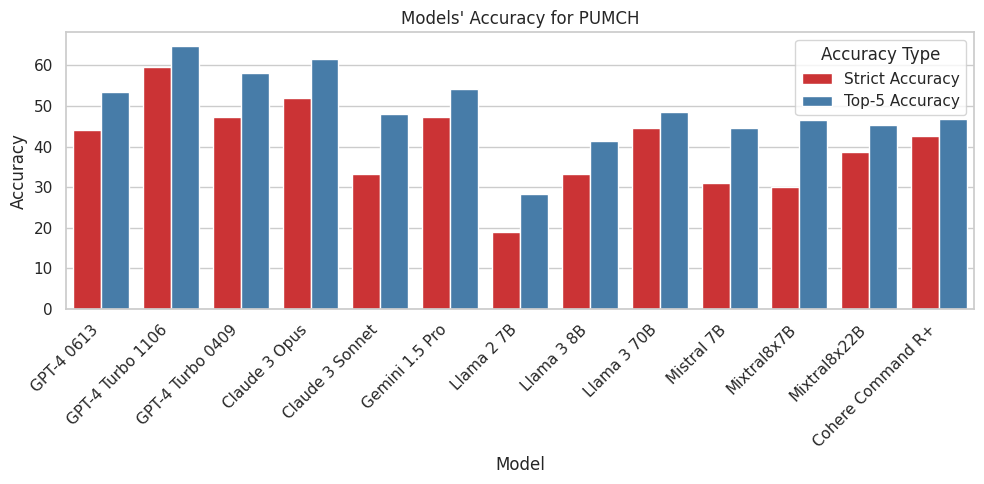

In [14]:
# Individual Plots - Models' Accuracy Across Different Datasets 
facet_data = data.melt(id_vars=["Model", "Dataset"], value_vars=["Strict Accuracy", "Top-5 Accuracy"], var_name="Accuracy Type", value_name="Accuracy")

unique_datasets = facet_data['Dataset'].unique()
for dataset in unique_datasets:
    dataset_specific_data = facet_data[facet_data['Dataset'] == dataset]
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Model", y="Accuracy", hue="Accuracy Type", data=dataset_specific_data, palette="Set1")
    plt.title(f"Models' Accuracy for {dataset}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
